# Biodiversity in National Parks Data Explration and Analysis

In this file I will explore the data and try to answer some questions about the biodiversity in National Parks. I will use the following datasets:  
- `observations.csv`
- `species_info.csv`


## Problem Defenition

There are many speicies observed within the national parks, some of them are endagered. I will try to analyse the data and attemt to find statistical insights about the conservational sataus of these species in relation to the parks and categories they belong to.

## Analysis

Descriptive:

- What is the distribution of conservation status for species?
- what is the park that has the most endangered species?
- what is the category that has the most endangered species?
- what is the most common species in each park?

Exploratory:

- is there a correlation between multiple types of speiceis and their conservation status?
- is there a correlation between the park and the conservation status of the species?
- is there a correlation between the category and the conservation status of the species?

Inferential:

- what is the probability of a species being endangered for each category?
- what is the probability of a species being endangered for each park?
- what is the probability of a species being endangered for each category and park?

Predictive:

- can we predict the conservation status of a species based on its category, park, and observations?


## Observing the data  

I will start by loading the data and exploring the first few rows of each dataset.

In [85]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn

In [86]:
import csv 
import numpy as np
import pandas as pd
import seaborn as sns


In [87]:
observations_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

print(observations_df.head())
print(observations_df.info())
print(observations_df.describe())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000

In [88]:
print(species_df.head())
print(species_df.info())
print(species_df.describe())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

Observing these datasets we can assume that the structure of the data is as follows:
- observations.csv:  

|Name|Type|Description|
|---|---|---|
|scientific_name| String | The scientific name of the species (foreign key) |
| park_name | String | The name of the national park where the species was observed |
| Observations | Int | The number of times the species was observed in the park |

- species_info.csv:

|Name|Type| Description|
|---|---| ---|
| category | String | The category of the species (mammal, bird, reptile, etc.) |
| scientific_name | String | The scientific name of the species (primary key)|
| common_names | String | The common names of the species |
| conservation_status | String | The species conservation status |

scientific name is the unique identifier for the species in both datasets.

### Cleaning the data 

immediatley there are NaN's in the conservation_status column. I will replace these with 'No Intervention' as it is likely that these species are not in danger.

In [89]:
#replace nan values with 'No Intervention'
species_df.fillna('No Intervention', inplace=True)
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


i will also check for duplicates, incorrect data types and other missing values.

In [90]:
#check for missing values
print("species_df")
print(species_df.count())
print("\nobservations_df")
print(observations_df.count())
#no missing values

species_df
category               5824
scientific_name        5824
common_names           5824
conservation_status    5824
dtype: int64

observations_df
scientific_name    23296
park_name          23296
observations       23296
dtype: int64


In [91]:
#check for dulplicates 
print(species_df.duplicated().sum())
print(observations_df.duplicated().sum())

observations_df.drop_duplicates()

#count number of instances of scientific name
species_count = species_df.common_names.groupby(species_df.common_names).count().reset_index(name='count').sort_values(['count'], ascending=False)
species_count

0
15


,common_names,count
771,Brachythecium Moss,7
1729,Dicranum Moss,7
3664,Panic Grass,6
4653,Sphagnum,6
901,Bryum Moss,6
...,...,...
1863,Eared Grebe,1
1862,"Eagle Fern, Hairy Brackenfern, Western Bracken...",1
1861,Dyer's Woad,1
1860,Dwarf Willow,1


In [92]:
#conosolodate scientific name in species_df
#sort species by scientific name
species_df = species_df.sort_values('scientific_name').reset_index(drop=True)
#loop through species_df and join the rows with the same scientific name by adding the common name to the previous instance
for i in range(1, len(species_df)):
    if species_df.scientific_name[i] == species_df.scientific_name[i-1]:
        species_df.common_names[i] = species_df.common_names[i-1] + ", " + species_df.common_names[i]
        species_df.drop(i-1, inplace=True)

In [93]:
#consolodate scientific names in observations_df
#sort species by scientific name and park name
observations_df = observations_df.sort_values(['scientific_name', 'park_name']).reset_index(drop=True)

#loop through observations_df and join the rows with the same scientific name by adding the observations to the previous instance that also matches the park name
for i in range(1, len(observations_df)):
    if observations_df.scientific_name[i] == observations_df.scientific_name[i-1] and observations_df.park_name[i] == observations_df.park_name[i-1]:
        observations_df.observations[i] = observations_df.observations[i-1] + observations_df.observations[i]
        observations_df.drop(i-1, inplace=True)




C:\Users\Holly\AppData\Local\Temp\ipykernel_6904\3511802394.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations_df.observations[i] = observations_df.observations[i-1] + observations_df.observations[i]
C:\Users\Holly\AppData\Local\Temp\ipykernel_6904\3511802394.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations_df.observations[i] = observations_df.observations[i-1] + observations_df.observations[i]
C:\Users\Holly\AppData\Local\Temp\ipykernel_6904\3511802394.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [94]:
#data types are correct
observations_df.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

### Data Inspection
I will now inspect the data for any initial trends, outliers or other interesting information.

#### General Observations

- There are 4 national parks in the data
  - each park has the same number of records in observations 
- There are 7 categories of species
  - the most common category is Vascular Plant
- There are 4 conservation statuses
    - the most common status is 'No Intervention'


In [95]:
#count of each park name in observations_df
observations_df.park_name.value_counts().reset_index()
#there is an equal number of observation records for each park

,park_name,count
0,Bryce National Park,5541
1,Great Smoky Mountains National Park,5541
2,Yellowstone National Park,5541
3,Yosemite National Park,5541


In [96]:
#the count of each category in species_df
category_count = species_df.category.value_counts().reset_index()
category_count['percentage'] = category_count['count']/category_count['count'].sum()*100
category_count
#this shows that there lots of vascular plant observation records

,category,count,percentage
0,Vascular Plant,4262,76.917524
1,Bird,488,8.807075
2,Nonvascular Plant,333,6.009746
3,Mammal,176,3.176322
4,Fish,125,2.255910
5,Amphibian,79,1.425735
6,Reptile,78,1.407688


In [97]:
#count of each conservation status in species_df
conservatiopon_status_v_species = species_df.conservation_status.value_counts().reset_index()
conservatiopon_status_v_species.rename(columns={'count':"_count"}, inplace=True)
conservatiopon_status_v_species['percentage'] = conservatiopon_status_v_species._count/conservatiopon_status_v_species._count.sum() * 100
conservatiopon_status_v_species
#this shows that most species are not under any conservation status

,conservation_status,_count,percentage
0,No Intervention,5362,96.769536
1,Species of Concern,151,2.725140
2,Endangered,15,0.270709
3,Threatened,10,0.180473
4,In Recovery,3,0.054142


#### Deeper Observations

- yellowstone has the most observations
  - is this to do with park size?
- vascular plant has the most observations
  - is this due to the number of species in this category?
- the number of observations per conservation status matches the same distribution as the number of species in each status


In [98]:
#number of obserevations for each park
park_v_observations = observations_df.groupby('park_name').observations.sum().reset_index()
park_v_observations['percentage'] = park_v_observations.observations/park_v_observations.observations.sum() * 100   
park_v_observations
#yellowstone has the most observations
#TODO: see if theres is a correlation between size of park and number of observations

,park_name,observations,percentage
0,Bryce National Park,576025,17.377688
1,Great Smoky Mountains National Park,431820,13.027270
2,Yellowstone National Park,1443562,43.549794
3,Yosemite National Park,863332,26.045248


In [99]:
size_of_park = pd.DataFrame({'park_name':['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park'], 'size':[35835, 522419, 2221766, 759620]})
size_of_park['percentage'] = size_of_park['size']/size_of_park['size'].sum() * 100
size_of_park

,park_name,size,percentage
0,Bryce National Park,35835,1.012391
1,Great Smoky Mountains National Park,522419,14.759100
2,Yellowstone National Park,2221766,62.768135
3,Yosemite National Park,759620,21.460375


C:\Users\Holly\AppData\Local\Temp\ipykernel_6904\3785039616.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=30)


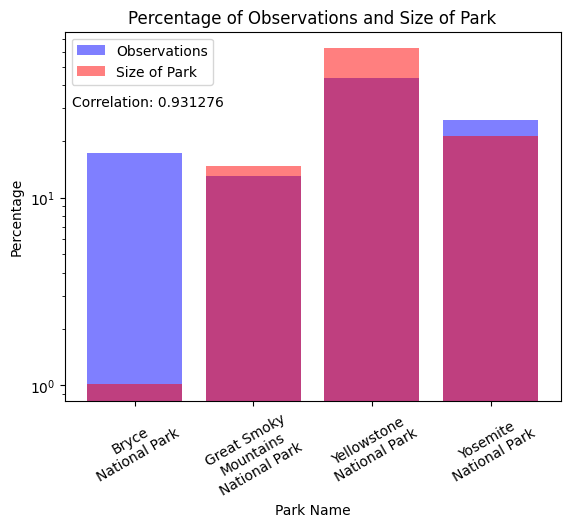

In [100]:
from scipy.stats import pearsonr
correlation , p = pearsonr(park_v_observations.percentage, size_of_park.percentage)
correlation = round(correlation, 6)

import matplotlib.pyplot as plt
ax = plt.subplot()
ax.set_yscale('log')
plt.bar(park_v_observations.park_name, park_v_observations.percentage, color='blue', alpha=0.5)
# ax.set_xticks(_x_tick_positions_list_)
plt.bar(size_of_park.park_name, size_of_park.percentage, color='red', alpha=0.5)
x_labels = ['Bryce\nNational Park', 'Great Smoky\nMountains\nNational Park', 'Yellowstone\nNational Park', 'Yosemite\nNational Park']
ax.set_xticklabels(x_labels, rotation=30)
plt.xlabel('Park Name')
plt.ylabel('Percentage')
plt.legend(['Observations', 'Size of Park'])
plt.title('Percentage of Observations and Size of Park')

plt.annotate(f'Correlation: {correlation}', (0, 0), (5, 220), xycoords='axes fraction', textcoords='offset points', va='top')
plot_name = 'graphs/percentage_of_observations_and_size_of_park.png'
plt.savefig(plot_name, bbox_inches='tight')
plt.show()


In [101]:
#number of obsrevations for each category
category_observations = observations_df.merge(species_df).groupby('category').observations.sum().reset_index().sort_values(by='observations', ascending=False)
category_observations['percentage'] = category_observations.observations/category_observations.observations.sum() * 100
category_observations


,category,observations,percentage
6,Vascular Plant,2555090,77.082690
1,Bird,292833,8.834270
4,Nonvascular Plant,190653,5.751675
3,Mammal,116696,3.520519
2,Fish,70818,2.136458
5,Reptile,44678,1.347859
0,Amphibian,43971,1.326530


C:\Users\Holly\AppData\Local\Temp\ipykernel_6904\176317702.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=30)


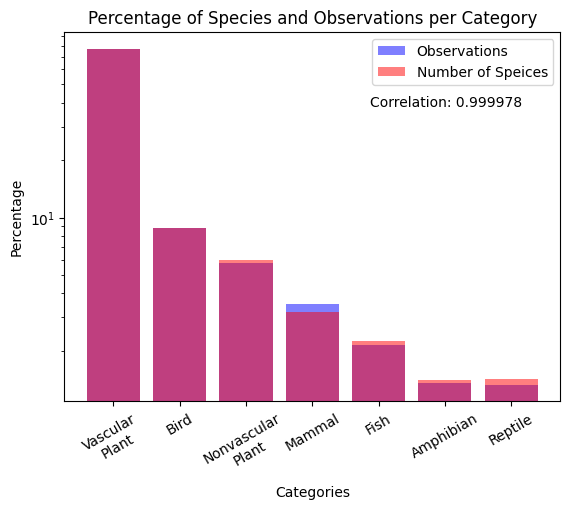

In [102]:
from scipy.stats import pearsonr
correlation , p = pearsonr(category_count.percentage, category_observations.percentage)
correlation = round(correlation, 6)

import matplotlib.pyplot as plt
ax = plt.subplot()
ax.set_yscale('log')
plt.bar(category_observations.category, category_observations.percentage, color='blue', alpha=0.5)
# ax.set_xticks(_x_tick_positions_list_)
plt.bar(category_count.category, category_count.percentage, color='red', alpha=0.5)
x_labels = ['Vascular\nPlant', 'Bird', 'Nonvascular\nPlant', 'Mammal', 'Fish', 'Amphibian', 'Reptile']
ax.set_xticklabels(x_labels, rotation=30)
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.legend(['Observations', 'Number of Speices'])
plt.title('Percentage of Species and Observations per Category')

plt.annotate(f'Correlation: {correlation}', (0, 0), (220, 220), xycoords='axes fraction', textcoords='offset points', va='top')
plot_name = 'graphs/percentage_of_species_and_observations_per_category.png'
plt.savefig(plot_name, bbox_inches='tight')
plt.show()

In [103]:
#number of observations for each conservation status
conversation_status_v_observation = observations_df.merge(species_df).groupby('conservation_status').observations.sum().reset_index().sort_values(by='observations', ascending=False)
conversation_status_v_observation['percentage'] = conversation_status_v_observation.observations / conversation_status_v_observation.observations.sum() * 100
conversation_status_v_observation

,conservation_status,observations,percentage
2,No Intervention,3224631,97.281596
3,Species of Concern,82579,2.491267
4,Threatened,3339,0.100732
0,Endangered,2798,0.084411
1,In Recovery,1392,0.041994


C:\Users\Holly\AppData\Local\Temp\ipykernel_6904\166949381.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(conservatiopon_status_v_species.conservation_status, rotation=30)


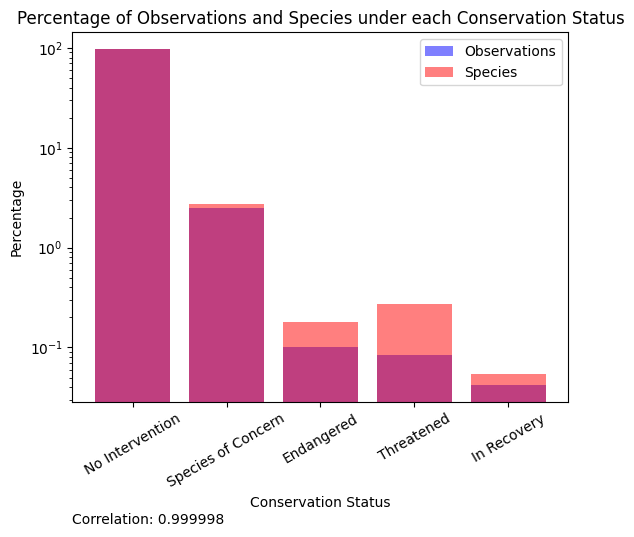

In [104]:
from scipy.stats import pearsonr
correlation , p = pearsonr(conversation_status_v_observation.percentage, conservatiopon_status_v_species.percentage)
correlation = round(correlation, 6)

import matplotlib.pyplot as plt
ax = plt.subplot()
ax.set_yscale('log')
plt.bar(conversation_status_v_observation.conservation_status, conversation_status_v_observation.percentage, color='blue', alpha=0.5)
# ax.set_xticks(_x_tick_positions_list_)
plt.bar(conservatiopon_status_v_species.conservation_status, conservatiopon_status_v_species.percentage, color='red', alpha=0.5)
ax.set_xticklabels(conservatiopon_status_v_species.conservation_status, rotation=30)
plt.xlabel('Conservation Status')
plt.ylabel('Percentage')
plt.legend(['Observations', 'Species'])
plt.title('Percentage of Observations and Species under each Conservation Status')

plt.annotate(f'Correlation: {correlation}', (0, 0), (0, -80), xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('graphs/percentage_of_observations_and_species_under_each_conservation_status.png', bbox_inches='tight')
plt.show()


In [105]:
#number of observations for each species
ovservations_speicies =  observations_df.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
ovservations_speicies

,scientific_name,observations
4993,Streptopelia decaocto,1785
2452,Holcus lanatus,1780
1103,Castor canadensis,1725
2555,Hypochaeris radicata,1720
4179,Puma concolor,1711
...,...,...
4247,Rana sierrae,144
3394,Noturus baileyi,143
5356,Vermivora bachmanii,141
805,Canis rufus,137


In [106]:
#number of observations for each park and category
obsercations_park_category = observations_df.merge(species_df).groupby(['park_name', 'category']).observations.sum().reset_index().sort_values(by='observations', ascending=False)
obsercations_park_category

,park_name,category,observations
20,Yellowstone National Park,Vascular Plant,1112927
27,Yosemite National Park,Vascular Plant,665461
6,Bryce National Park,Vascular Plant,443083
13,Great Smoky Mountains National Park,Vascular Plant,333619
15,Yellowstone National Park,Bird,127251
18,Yellowstone National Park,Nonvascular Plant,83021
22,Yosemite National Park,Bird,76207
1,Bryce National Park,Bird,51647
17,Yellowstone National Park,Mammal,50795
25,Yosemite National Park,Nonvascular Plant,49783


## Descriptive Analysis

1. What is the distribution of conservation status for species?
2. what is the park that has the most endangered species?
3. what is the category that has the most endangered species?
4. what is the most common species in each park?

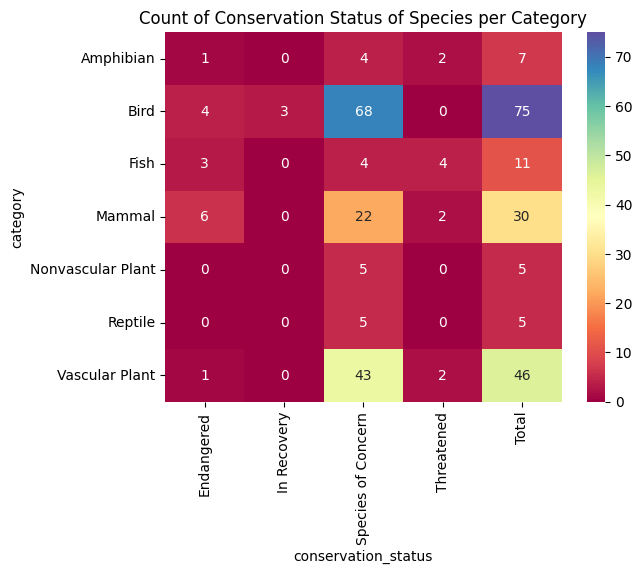

In [138]:
# 1. what is the distribution of conservation status for species?
#crosstab category - conservation status minus no intervention

ct_category_conservation = pd.crosstab(species_df[species_df['conservation_status']!='No Intervention']['category'], 
                                       species_df[species_df['conservation_status']!='No Intervention']['conservation_status'])
ct_category_conservation['Total'] = ct_category_conservation.sum(axis=1)
#graph title
plt.title('Count of Conservation Status of Species per Category')
#plot heatmap
sns.heatmap(ct_category_conservation, cmap='Spectral', annot=True, fmt='g')
#save plot
plt.savefig('graphs/conservation_status_of_species_per_category.png', bbox_inches='tight')

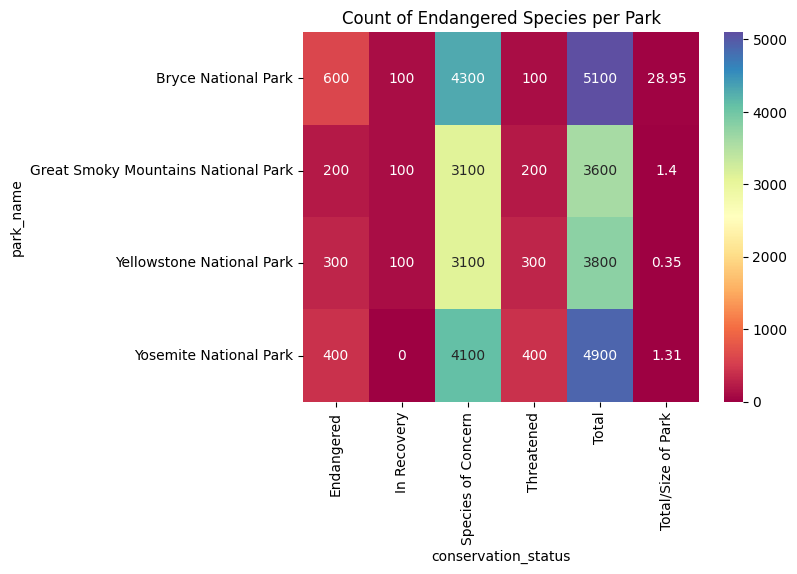

In [ ]:
#2. what park has the most endangered species?
#cross tab park - conservation status minus no intervention
# ct_park_species_minus_no_intervention = pd.crosstab(observations_df['park_name'],
#                                                     species_df[species_df['conservation_status']!='No Intervention']['conservation_status'], 
#                                                     values=observations_df['observations'],
#                                                     aggfunc='sum')

ct_park_species_minus_no_intervention = pd.crosstab(observations_df['park_name'],
                                                    species_df[species_df['conservation_status']!='No Intervention']['conservation_status'], 
                                                    )
#make the variables a percentage
ct_park_species_minus_no_intervention = ct_park_species_minus_no_intervention * 100
#SET NAN values to 0
ct_park_species_minus_no_intervention.fillna(0, inplace=True)
# add a total column
ct_park_species_minus_no_intervention['Total'] = ct_park_species_minus_no_intervention.sum(axis=1)
# add total/size of park column
park_sizes = {'Bryce National Park':35835, 'Great Smoky Mountains National Park':522419, 'Yellowstone National Park':2221766, 'Yosemite National Park':759620}
total_percentage = ct_park_species_minus_no_intervention['Total'] / ct_park_species_minus_no_intervention['Total'].sum() * 100
park_size_percentage = pd.Series(park_sizes) / sum(park_sizes.values()) * 100
ct_park_species_minus_no_intervention['Total/Size of Park'] = round(total_percentage / park_size_percentage,2)

#graph title
plt.title('Count of Endangered Species per Park')
sns.heatmap(ct_park_species_minus_no_intervention, cmap='Spectral', annot=True, fmt='g')
#save plot
plt.savefig('graphs/count_of_endangered_species_per_park.png', bbox_inches='tight')


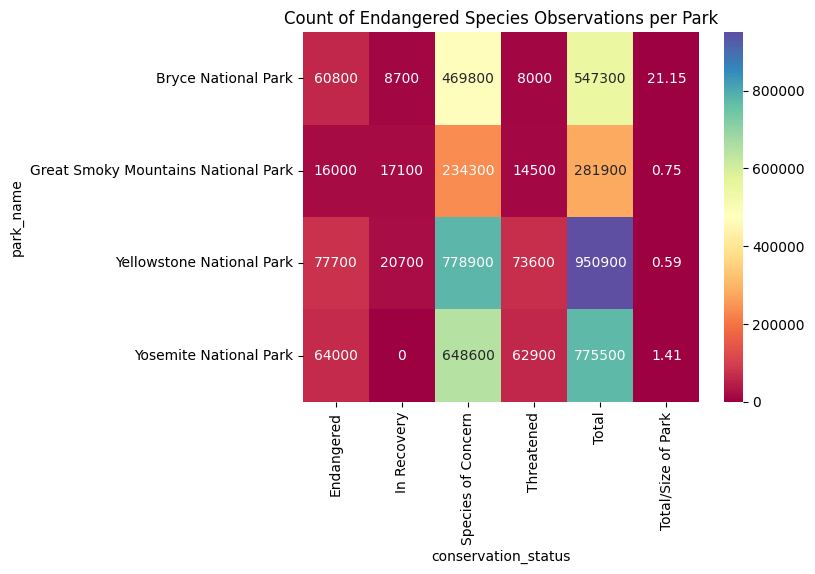

In [137]:
#2. what park has the most endangered species?
#cross tab park - conservation status minus no intervention
ct_park_species_minus_no_intervention = pd.crosstab(observations_df['park_name'],
                                                    species_df[species_df['conservation_status']!='No Intervention']['conservation_status'], 
                                                    values=observations_df['observations'],
                                                    aggfunc='sum')

# ct_park_species_minus_no_intervention = pd.crosstab(observations_df['park_name'],
#                                                     species_df[species_df['conservation_status']!='No Intervention']['conservation_status'], 
#                                                     )
#make the variables a percentage
ct_park_species_minus_no_intervention = ct_park_species_minus_no_intervention * 100
#SET NAN values to 0
ct_park_species_minus_no_intervention.fillna(0, inplace=True)
# add a total column
ct_park_species_minus_no_intervention['Total'] = ct_park_species_minus_no_intervention.sum(axis=1)
# add total/size of park column
park_sizes = {'Bryce National Park':35835, 'Great Smoky Mountains National Park':522419, 'Yellowstone National Park':2221766, 'Yosemite National Park':759620}
total_percentage = ct_park_species_minus_no_intervention['Total'] / ct_park_species_minus_no_intervention['Total'].sum() * 100
park_size_percentage = pd.Series(park_sizes) / sum(park_sizes.values()) * 100
ct_park_species_minus_no_intervention['Total/Size of Park'] = round(total_percentage / park_size_percentage,2)

#graph title
plt.title('Count of Endangered Species Observations per Park')
sns.heatmap(ct_park_species_minus_no_intervention, cmap='Spectral', annot=True, fmt='g')
#save plot
plt.savefig('graphs/count_of_endangered_species_observations_per_park.png', bbox_inches='tight')


In [151]:
#3. what is the most common species in each park?
#bryce 
bryce = observations_df[observations_df['park_name']=='Bryce National Park'].merge(species_df)
bryce = bryce.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
bryce = bryce.merge(species_df)


#smoky
smoky = observations_df[observations_df['park_name']=='Great Smoky Mountains National Park'].merge(species_df)
smoky = smoky.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
smoky = smoky.merge(species_df)

#yellowstone
yellowstone = observations_df[observations_df['park_name']=='Yellowstone National Park'].merge(species_df)
yellowstone = yellowstone.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
yellowstone = yellowstone.merge(species_df)


#yosemite
yosemite = observations_df[observations_df['park_name']=='Yosemite National Park'].merge(species_df)
yosemite = yosemite.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
yosemite = yosemite.merge(species_df)
  

#create table of most common species in each park
most_common_species = pd.concat([bryce.head(1), smoky.head(1), yellowstone.head(1), yosemite.head(1)])
most_common_species['Park'] = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

most_common_species

,scientific_name,observations,category,common_names,conservation_status,Park
0,Columba livia,339,Bird,"Rock Dove, Common Pigeon, Rock Dove, Rock Pige...",No Intervention,Bryce National Park
0,Streptopelia decaocto,256,Bird,"Eurasian Collared Dove, Eurasian Collared Dove...",No Intervention,Great Smoky Mountains National Park
0,Holcus lanatus,805,Vascular Plant,"Common Velvetgrass, Yorkshire-Fog, Common Velv...",No Intervention,Yellowstone National Park
0,Hypochaeris radicata,505,Vascular Plant,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",No Intervention,Yosemite National Park


In [154]:
#3. what is the most common species in each park?
#bryce 
bryce = observations_df[observations_df['park_name']=='Bryce National Park'].merge(species_df)
bryce = bryce[bryce['conservation_status']!='No Intervention'].groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
bryce = bryce.merge(species_df)


#smoky
smoky = observations_df[observations_df['park_name']=='Great Smoky Mountains National Park'].merge(species_df)
smoky = smoky[smoky['conservation_status']!='No Intervention'].groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
smoky = smoky.merge(species_df)

#yellowstone
yellowstone = observations_df[observations_df['park_name']=='Yellowstone National Park'].merge(species_df)
yellowstone = yellowstone[yellowstone['conservation_status']!='No Intervention'].groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
yellowstone = yellowstone.merge(species_df)


#yosemite
yosemite = observations_df[observations_df['park_name']=='Yosemite National Park'].merge(species_df)
yosemite = yosemite[yosemite['conservation_status']!='No Intervention'].groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
yosemite = yosemite.merge(species_df)
  

#create table of most common species in each park
most_common_species = pd.concat([bryce.head(1), smoky.head(1), yellowstone.head(1), yosemite.head(1)])
most_common_species['Park'] = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

most_common_species

,scientific_name,observations,category,common_names,conservation_status,Park
0,Myotis lucifugus,298,Mammal,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern,Bryce National Park
0,Myotis lucifugus,174,Mammal,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern,Great Smoky Mountains National Park
0,Myotis lucifugus,679,Mammal,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern,Yellowstone National Park
0,Myotis lucifugus,396,Mammal,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern,Yosemite National Park


In [ ]:
#4. whar are the least common species in each park?

#bryce 
bryce = observations_df[observations_df['park_name']=='Bryce National Park'].merge(species_df)
bryce = bryce.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=True)
bryce = bryce.merge(species_df)


#smoky
smoky = observations_df[observations_df['park_name']=='Great Smoky Mountains National Park'].merge(species_df)
smoky = smoky.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=True)
smoky = smoky.merge(species_df)

#yellowstone
yellowstone = observations_df[observations_df['park_name']=='Yellowstone National Park'].merge(species_df)
yellowstone = yellowstone.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=True)
yellowstone = yellowstone.merge(species_df)


#yosemite
yosemite = observations_df[observations_df['park_name']=='Yosemite National Park'].merge(species_df)
yosemite = yosemite.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=True)
yosemite = yosemite.merge(species_df)
  

#create table of most common species in each park
least_common_species = pd.concat([bryce.head(1), smoky.head(1), yellowstone.head(1), yosemite.head(1)])
least_common_species['Park'] = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

least_common_species

,scientific_name,observations,category,common_names,conservation_status,Park
0,Corydalis aurea,9,Vascular Plant,"Golden Corydalis, Scrambled Eggs",No Intervention,Bryce National Park
0,Collomia tinctoria,10,Vascular Plant,"Staining Collomia, Yellowstain Collomia",No Intervention,Great Smoky Mountains National Park
0,Grus americana,57,Bird,Whooping Crane,Endangered,Yellowstone National Park
0,Noturus baileyi,31,Fish,Smoky Madtom,Endangered,Yosemite National Park


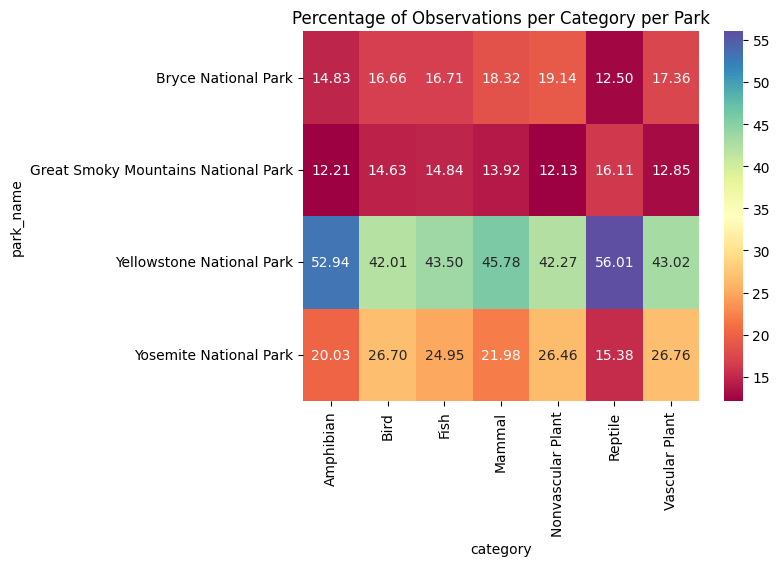

In [158]:
# cross tab park - category
# FIXME: i dont think its normalising for each park
ct_park_species = pd.crosstab(observations_df['park_name'],
                              species_df['category'], 
                              values=observations_df['observations'], 
                              aggfunc='sum')

ct_park_species = round(ct_park_species / ct_park_species.sum() * 100, 2)
sns.heatmap(ct_park_species, cmap='Spectral', annot=True, fmt='.2f')

plt.title('Percentage of Observations per Category per Park')
plt.savefig('graphs/percentage_of_observations_per_category_per_park.png', bbox_inches='tight')



## Exploratory Analysis

1. Is there a correlation between the category and the conservation status of the species?
2. Is there a correlation between the park and the conservation status of the species?
correlation between observations and conservation status



C:\Users\Holly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Holly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


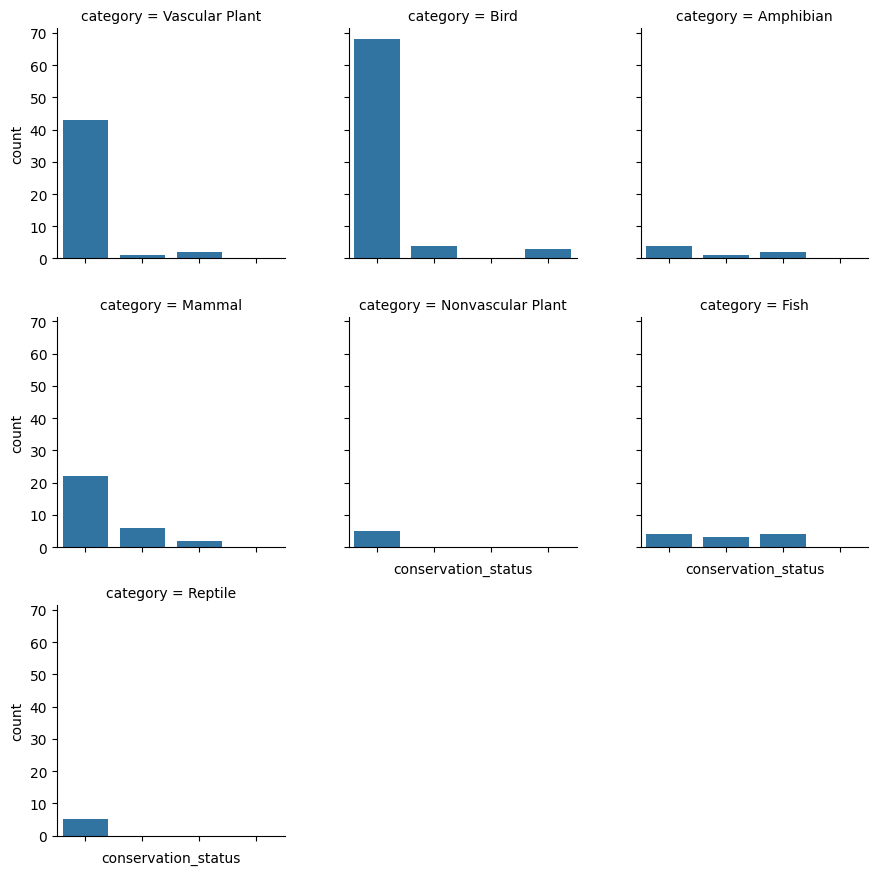

In [202]:
g = sns.FacetGrid(data=species_df[species_df['conservation_status']!= "No Intervention"], col='category', col_wrap=3)
g.map(sns.countplot, 'conservation_status')
g.set_xticklabels(rotation=90)


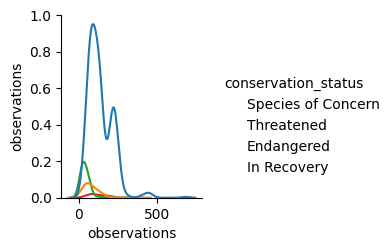

In [210]:
all_data = pd.merge(observations_df, species_df, on='scientific_name')
g = sns.PairGrid(data=all_data[all_data['conservation_status']!="No Intervention"], hue='conservation_status')
g.map_diag(sns.kdeplot)
g.add_legend()

C:\Users\Holly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


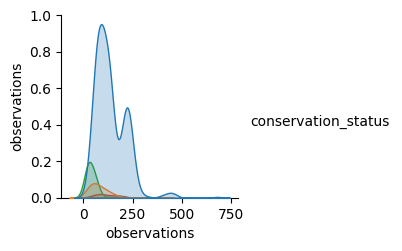

In [211]:
sns.pairplot(all_data[all_data['conservation_status']!="No Intervention"], hue='conservation_status')

chi-squared: 591.1513416161314
p-value: 0.000000


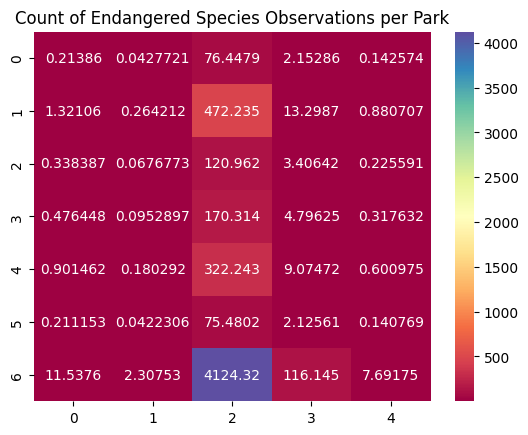

In [199]:
# 1. Is there a correlation between multiple types of species and their conservation status?
#merge species and observations
ct_species_conservation = pd.crosstab(species_df['category'], species_df['conservation_status']) 


ct_species_conservation.fillna(0, inplace=True)

# ct_species_conservation_prop = round(ct_species_conservation/len(species_df) * 100, 2)

# ct_species_conservation_marg_1 = ct_species_conservation_prop.sum(axis=1)
# ct_species_conservation_marg_2 = ct_species_conservation_prop.sum(axis=0)

# ct_species_conservation_marg = pd.concat([ct_species_conservation_prop, ct_species_conservation_marg_1], axis=1)
                                                    
plt.title('Count of Endangered Species Observations per Park')

# sns.heatmap(ct_species_conservation, cmap='Spectral', annot=True, fmt='g')

# sns.heatmap(ct_species_conservation_prop, cmap='Spectral', annot=True, fmt='g')
# sns.heatmap(ct_species_conservation_marg, cmap='Spectral', annot=True, fmt='g')
#correlation
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct_species_conservation)

sns.heatmap(expected, cmap='Spectral', annot=True, fmt='g')

print(f"chi-squared: {chi2}")
print(f"p-value: {format(p, '.6f')}")



chi-squared: 1557.627237357293
p-value: 0.000000


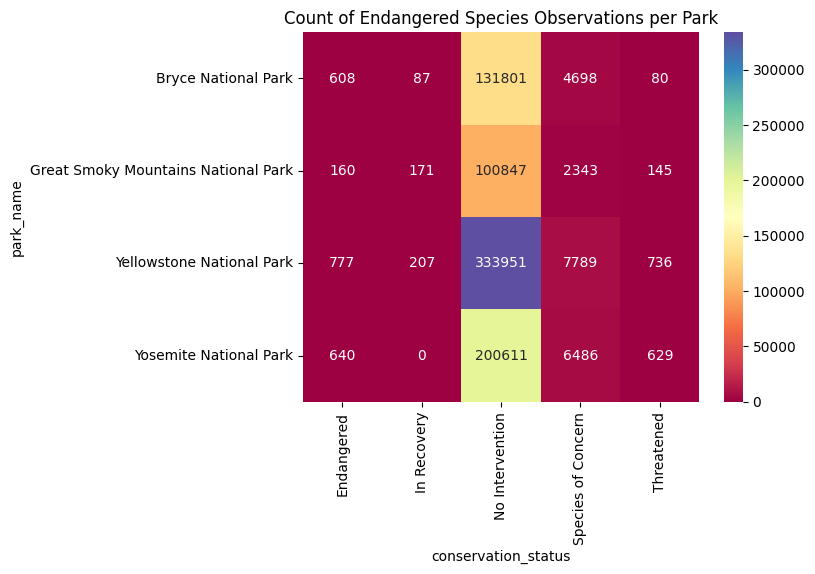

In [177]:
#2. Is there a correlation between the park and the conservation status of the species?

ct_park_conservation = pd.crosstab(observations_df['park_name'], species_df['conservation_status'], values=observations_df['observations'], aggfunc='sum')
ct_park_conservation.fillna(0, inplace=True)

plt.title('Count of Endangered Species Observations per Park')
sns.heatmap(ct_park_conservation, cmap='Spectral', annot=True, fmt='g')

#correlation
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct_park_conservation)

print(f"chi-squared: {chi2}")
print(f"p-value: {format(p, '.6f')}")


Text(0.5, 1.0, 'Boxplot of Observations per Category')

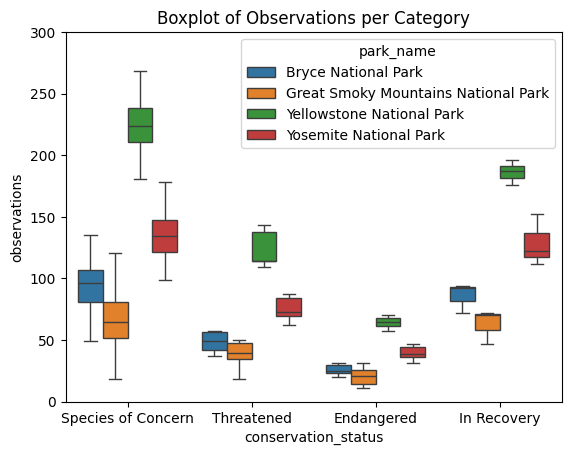

In [189]:
all_data = pd.merge(observations_df, species_df, on='scientific_name')
all_data = all_data[all_data['conservation_status'] != 'No Intervention']

sns.boxplot(data = all_data, x = 'conservation_status', y = 'observations', hue = 'park_name', fliersize=0)
#set ymax to 300
plt.ylim(0, 300)
plt.title('Boxplot of Observations per Category')
